import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

cities_cvs_file = pd.read_csv('./cities.csv')

cities_cvs_file.isnull().sum()

In [2]:
%pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
#make the cities csv file into a reable dataframe
cities_df = pd.read_csv('./cities.csv', encoding='latin1')
#looking for where there is a null value and putting the location into a new value
cities_rows_no_desc = cities_df[cities_df.isnull().any(axis=1)]
#null value found in 1 place in the description column
#can use the latitude and longitude to do a reverse geocoder search to find a description, but does not work for
#some reason
#so will use the city (Yokohama) and the region (Japan) to produce new description
new_desc = f"{cities_rows_no_desc.iloc[0]['City']}, {cities_rows_no_desc.iloc[0]['Region']}"
#new description is placed back into the original dataframe
cities_df.iloc[cities_df[cities_df.isnull().any(axis=1)].index[0],5] = new_desc
#when printing the dataframe again we can see there are no null values now
print(cities_df.isnull().sum())





City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         0
dtype: int64


In [70]:
#searching for number of null data in sales_rep.csv
sales_rep_df = pd.read_csv('./sales_rep.csv', encoding='latin1')

sales_rep_df.isnull().sum()

#null data found in Sales Rep Name 2&3, but data is unimportant so will ignore

Manager             0
Manager Number      0
Path                0
Sales Rep Name      0
Sales Rep Name1     0
Sales Rep Name2     5
Sales Rep Name3    25
Sales Rep ID        0
dtype: int64

In [77]:
#searching for number of null data in sales.csv
sales_df = pd.read_csv('./sales.csv', encoding='latin1')

sales_df.isnull().sum()
#there is no null data in this csv

%KEY                      0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
dtype: int64

In [79]:
#searching for number of null data in item_master.csv
item_master_df = pd.read_csv('./item_master.csv', encoding='latin1')

item_master_df.isnull().sum()

#there is no null data in this csv

Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64

In [80]:
#searching for number of null data in customers.csv
customers_df = pd.read_csv('./customers.csv', encoding='latin1')

customers_df.isnull().sum()
#there is no null data in this csv

Customer           0
Customer Number    0
City Code          0
dtype: int64

In [86]:
#combine the customer dataframe with the cities dataframe via the City Code column
combined = pd.merge(customers_df, cities_df, how="outer", left_on='City Code', right_on='City Code')
print(combined)

                       Customer  Customer Number  City Code      City Region  \
0             A Superior System       10000453.0          1  New York    USA   
1    Beech Aircraft Corporation       10003882.0          1  New York    USA   
2             Deere and Company       10009863.0          1  New York    USA   
3            Gailey Enterprises       10012851.0          1  New York    USA   
4    J.A. Bauer Pottery Company       10017852.0          1  New York    USA   
..                          ...              ...        ...       ...    ...   
680                   LiveWORLD       10019909.0         60    Bolton     UK   
681                       Qwest       10022423.0         60    Bolton     UK   
682                    Tailwind       10025021.0         60    Bolton     UK   
683                  YourFuture       10027053.0         60    Bolton     UK   
684                         NaN              NaN         61  Plymouth     UK   

      Latitude  Longitude              

In [88]:
combined[combined['City Code'] == 95]

,Customer,Customer Number,City Code,City,Region,Latitude,Longitude,Desc
64,Aaron D. Meyer & Associates,10000472.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
65,Betacorp,10005006.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
66,Dayton Malleable Inc.,10009647.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
67,FIBERWORKS,10011981.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
68,Hetrick Systems,10015793.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
69,Laker Airways,10019678.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
70,Pacific Matics,10021179.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
71,Paperless Group,10021458.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
72,Sagent,10023513.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"
73,SignatureFactory,10024270.0,95,Yokohama,Japan,35.455592,139.572196,"Yokohama, Japan"


<AxesSubplot:xlabel='Region'>

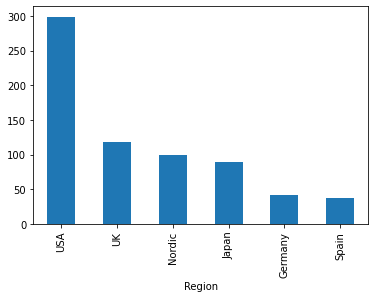

In [97]:
import matplotlib.pyplot as plt

combined.value_counts("Region").plot(kind="bar")
#We can see that from the first graph that USA is the region where most of the orders are from, followed by the UK, Nordic region, Japan, Germany and then Spain.



<AxesSubplot:xlabel='City'>

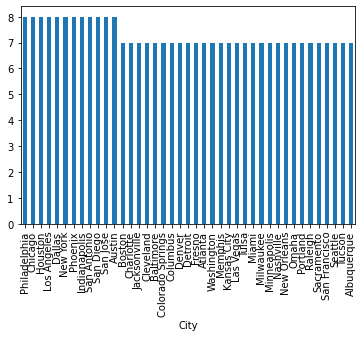

In [100]:
US_data=combined[combined['Region'] == "USA"]
US_data.value_counts("City").plot(kind="bar")

#We can see that there are 12 US cities that contain the most amount of orders for US regions, and there average number of orders from each US city is between 7 and 8 orders

<AxesSubplot:xlabel='City'>

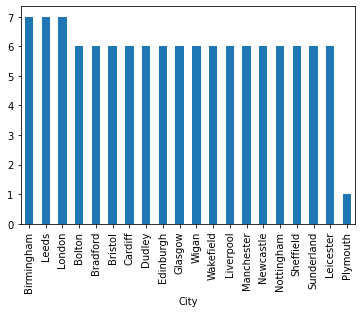

In [101]:
UK_data=combined[combined['Region'] == "UK"]
UK_data.value_counts("City").plot(kind="bar")
#We can see that the average number of orders from each UK cities is around 6 orders per city, with 3 cities (Birmingham, Leeds and London) having more orders than the average city.

<AxesSubplot:xlabel='City'>

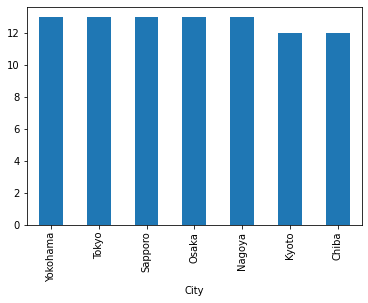

In [102]:
Japan_data=combined[combined['Region'] == "Japan"]
Japan_data.value_counts("City").plot(kind="bar")
#Out of the UK, US and Japan, we can see that the Japanese have the high average order density for each city, with the resulting graph indicating the average sits above 12 orders per city.